In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cars.csv')

df = df.rename(columns={
    'CarName':'car_name',
    'fueltype': 'fuel_type',
    'doornumber': 'door_number',
    'carbody':'car_body',
    'enginelocation':'engine_location',
    'wheelbase': 'wheel_base',
    'carlength': 'car_length',
    'carwidth': 'car_width',
    'curbweight':'curb_weight',
    'enginetype': 'engine_type',
    'cylindernumber': 'cylinder_number',
    'enginesize':'engine_size',
    'fuelsystem': 'fuel_system',
    'boreratio': 'bore_ratio',
    'compressionratio':'compression_ratio',
    'horsepower':'horse_power',
    'peakrpm':'peak_rpm',
    'citympg':'city_mpg',
    'highwaympg':'highway_mpg',
    'drivewheel':'wheel_drive'
    })

# rozdelit jmena na brand - model
df['car_name_split'] = df['car_name'].str.split(' ')
df['brand'] = df['car_name_split'].apply(lambda x: x[0])
df['model'] = df['car_name_split'].apply(lambda x: " ".join(x[1:]))

# # nulove hodnoty
# st.write(df.isna().sum().sort_values(ascending=False))

## uprava spatnych jmen
df['brand'] = df['brand'].replace({
    'alfa-romero':'alfa-romeo',
    'vokswagen':'volkswagen',
    'toyouta':'toyota',
    'Nissan':'nissan',
    'maxda':'mazda',
    'porcshce':'porsche'
    })

## mapping pro cylinder number
df['cylinder_number'] = df['cylinder_number'].map({
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
})

In [3]:
df_num = df.select_dtypes(exclude=['object'])

car_ID


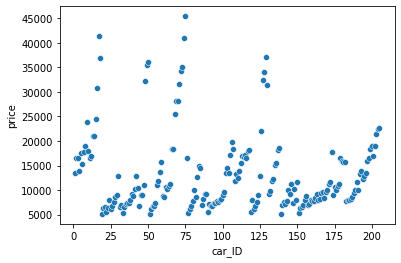

symboling


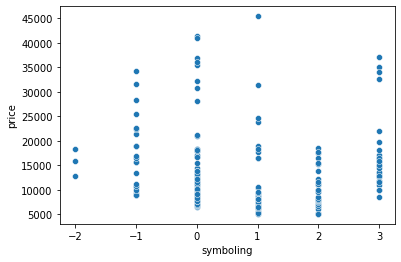

wheel_base


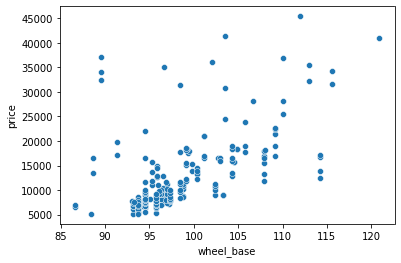

car_length


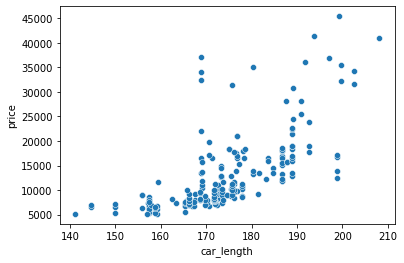

car_width


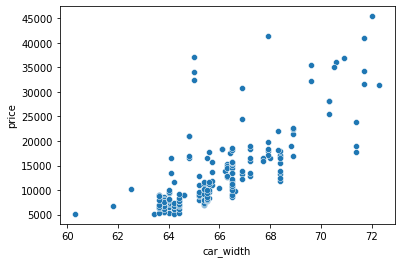

carheight


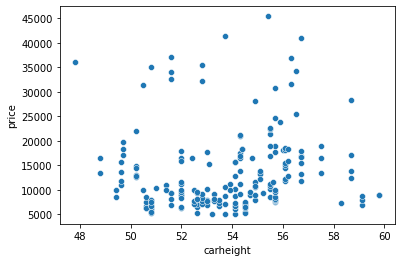

curb_weight


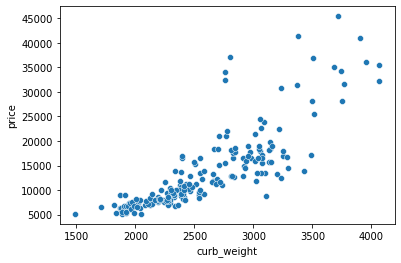

cylinder_number


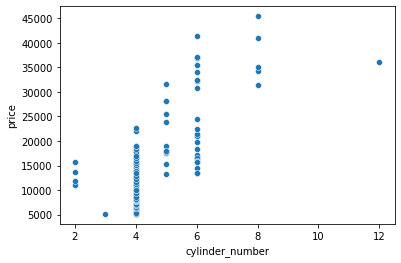

engine_size


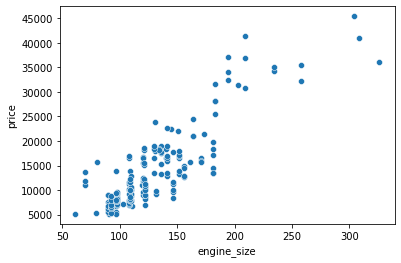

bore_ratio


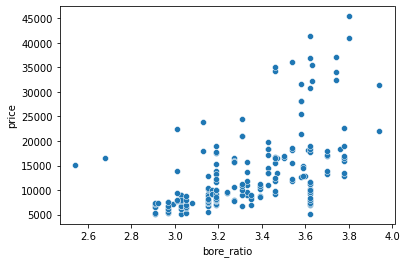

stroke


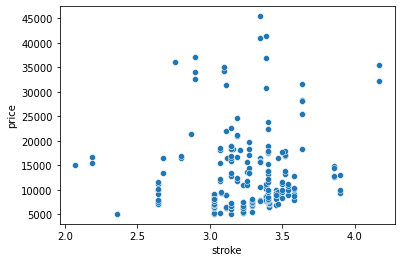

compression_ratio


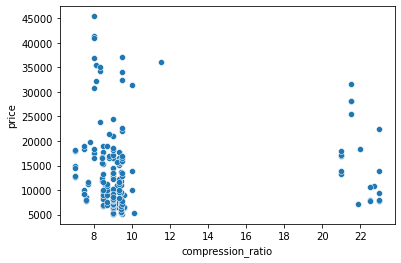

horse_power


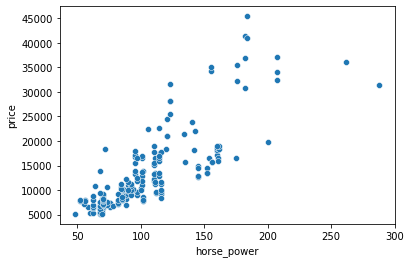

peak_rpm


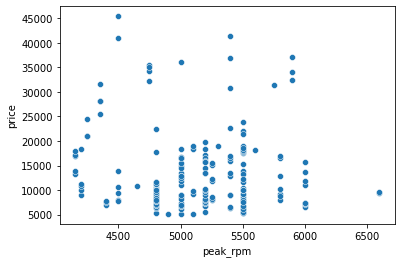

city_mpg


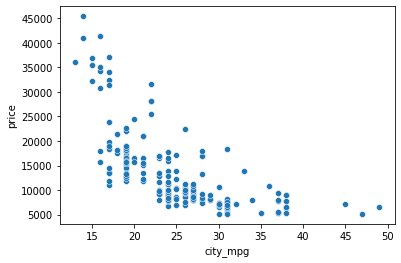

highway_mpg


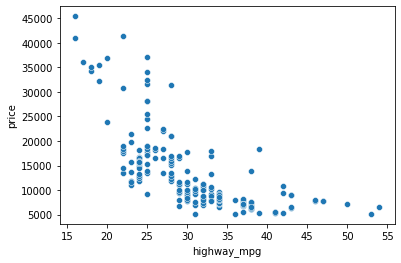

price


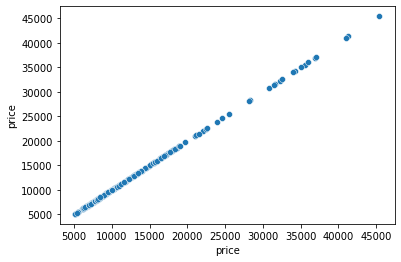

In [4]:
for col in df_num:
    print(col)
    sns.scatterplot(x=col, y='price', data=df_num)
    plt.show()

In [5]:
cols = ['wheel_base', 'car_length', 'car_width', 'curb_weight', 'cylinder_number', 'engine_size', 'bore_ratio', 'horse_power', 'city_mpg', 'highway_mpg', 'price']
df_reg = df[cols]

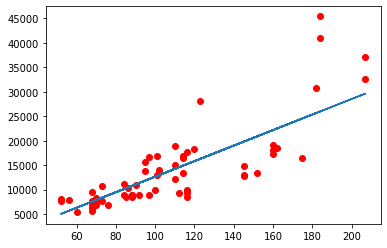

'Mean squared error: 24103542.35'

'R2 Coefficient: 0.66'

In [6]:
df_train, df_test = train_test_split(df_reg, train_size=0.7, test_size=0.3, random_state=100)
reg = linear_model.LinearRegression()
reg.fit(df_train[['horse_power']], df_train.price)

predicted = reg.predict(df_test[['horse_power']])

plt.scatter(df_test['horse_power'], df_test['price'], c='r')
plt.plot(df_test['horse_power'], predicted)
plt.show()

display("Mean squared error: %.2f" % mean_squared_error(df_test['price'], predicted))
display("R2 Coefficient: %.2f" % r2_score(df_test['price'], predicted))

In [7]:
## train test split
df_train, df_test = train_test_split(df_reg, train_size=0.7, test_size=0.3, random_state=100)

y_train = df_train.pop('price')
x_train = df_train

y_test = df_test.pop('price')
x_test = df_test

## scaling and training
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_train_df = pd.DataFrame(x_train_scaled, index=x_train.index, columns=x_train.columns)

reg = linear_model.LinearRegression()
reg.fit(x_train_df, y_train)

## scaling test and predict

x_test_scaled = scaler.transform(x_test)
x_test_df = pd.DataFrame(x_test_scaled, index=x_test.index, columns=x_test.columns)

predicted = reg.predict(x_test_df)

predicted = pd.Series(predicted)
y_test = y_test.reset_index().drop(columns='index')
comparison = pd.concat([predicted, y_test], axis=1)

In [8]:
display("Mean squared error: %.2f" % mean_squared_error(y_test, predicted))
display("R2 Coefficient: %.2f" % r2_score(y_test, predicted))

'Mean squared error: 14616682.75'

'R2 Coefficient: 0.79'

In [9]:
example = [95.7,166.3,64.4,2094,4,98,3.19,70,38,47]
regressor_prep = pd.DataFrame(example, index=x_test.columns).T
reg_prep_scaled = pd.DataFrame(scaler.transform(regressor_prep), columns=x_test.columns)
reg_prep_scaled

,wheel_base,car_length,car_width,curb_weight,cylinder_number,engine_size,bore_ratio,horse_power,city_mpg,highway_mpg
0,-0.475189,-0.566894,-0.652569,-0.82085,-0.351431,-0.660242,-0.451443,-0.822372,1.887918,2.320526


In [10]:
reg.predict(reg_prep_scaled)

array([7461.3452673])